In [ ]:
#importamos las librerias necesarias
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#Leemos los datos, que en en este caso son tweets comentando sobre una serie de videojuegos,
#en este caso nos vamos a centrar en el texto y en su etiqueta
df = pd.read_csv("twitter_training.csv", header=None)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df = df.drop([0,1], axis=1)
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(74682, 2)

In [ ]:
#Eliminamos las palabras que pueden hacer que nuestro modelo empeore su rendimiento
import re
def clean_text(text):
  if not isinstance(text, str):  # Verifica si no es una cadena
    text = str(text)

  text = re.sub(r'http\S+', '', text)  # Elimina URLs
  text = re.sub(r'@\w+', '', text)  # Elimina menciones (@usuario)
  text = re.sub(r'#\w+', '', text)  # Elimina hashtags
  text = re.sub(r'\W+', ' ', text)  # Elimina caracteres no alfanuméricos
  return text

In [ ]:
#Pasamos el texto a la variable "X" y las etiquetas a la variable "y"
X = np.array([clean_text(text) for text in df[3]], dtype=str)
y = np.array(df[2])

In [ ]:
#Vemos las clases de "y"
np.unique(y)

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
#Vemos si las clases están desvalanceadas
from collections import Counter
print(Counter(y))

Counter({'Negative': 22542, 'Positive': 20832, 'Neutral': 18318, 'Irrelevant': 12990})


In [ ]:
#Pasamos las etiquetas a tipo númerico para poder entrenar el modelo
condition = [

      y == "Positive",
      y == "Neutral",
      y == "Irrelevant",
      y == "Negative"
]
values = [3,2,1,0]
y = np.select(condition, values)

In [ ]:
#Dividimos las datos en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle = True)

In [ ]:
#Inicializamos las siguientes variables, correspondientes al modelo que utilizaremos
#y al numero de clases que tenemos
model_name = "distilbert-base-uncased"
num_classes = 4

In [ ]:
#Inicializamos el tokenizador
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
#Tokenizamos las variables de texto para poder introducirlas en nuestro modelo DistilBert
max_length= 128
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True,max_length=max_length)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length = max_length)

In [ ]:
#Como última parte del preprocesamiento, utilizamos la siguiente función para convertir
#nuestros datos a tensores, lo cual optimiza nuestra red de Tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
for data in train_dataset.take(1):

  print(data)

({'input_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  2026, 15003,  2572,  8237, 21815,  3775,  2480,  2001,
        2061,  5506,  2012,  2033,  2005,  3810,  2014,  4524,  2046,
        1037, 26829,  1997,  8840,  2140,  1998,  4086, 12509,   102,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,  

In [ ]:
#Utilizamos esta función para inicializar nuestro modelo de análisis de texto
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
#A continuación asignamos el optimizador y la función de perdida para nuestro modelo.
#En este caso especificamos un learning rate tan pequeño para tener cuidado con ajustar los pesos
#de este tipo de modelos que ya han sido entrenados.
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [ ]:
#Entrenamos el modelo y vemos que obtenemos un buen resultado
history = model.fit(train_dataset.batch(16),
                    validation_data = test_dataset.batch(16),
                    epochs=5
                    )

Epoch 1/5
3735/3735 [==============================] - 852s 221ms/step - loss: 0.9300 - accuracy: 0.6256 - val_loss: 0.7170 - val_accuracy: 0.7217
Epoch 2/5
3735/3735 [==============================] - 822s 220ms/step - loss: 0.5339 - accuracy: 0.8016 - val_loss: 0.4635 - val_accuracy: 0.8322
Epoch 3/5
3735/3735 [==============================] - 837s 224ms/step - loss: 0.2909 - accuracy: 0.8935 - val_loss: 0.3695 - val_accuracy: 0.8699
Epoch 4/5
3735/3735 [==============================] - 821s 220ms/step - loss: 0.1858 - accuracy: 0.9297 - val_loss: 0.3585 - val_accuracy: 0.8851
Epoch 5/5
3735/3735 [==============================] - 822s 220ms/step - loss: 0.1390 - accuracy: 0.9457 - val_loss: 0.3378 - val_accuracy: 0.8939


In [ ]:
#Calculamos predicciones para hacer una matriz de confusión
y_prob = model.predict(test_dataset)

14937/14937 [==============================] - 130s 9ms/step


In [ ]:
y_pred = tf.math.argmax(y_prob.logits, axis = 1)

In [ ]:
#Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

In [ ]:
#Verificamos que está bien, calculando el accuracy
np.sum(y_pred == y_test) / len(y_test)

0.8938876615116824

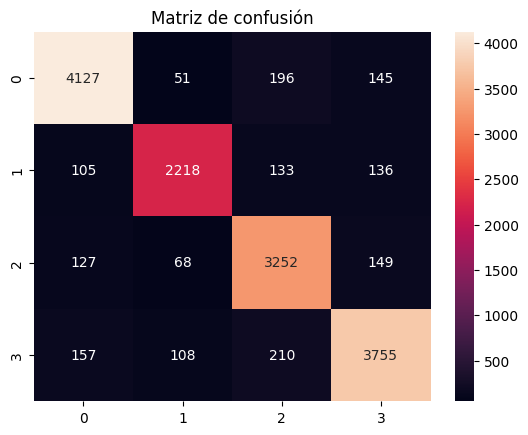

<Figure size 1600x1200 with 0 Axes>

In [ ]:
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.title("Matriz de confusión")
plt.figure(figsize = (16,12))
plt.show()

Vemos como la clase que más fallo da al clasificar es la de **Neutral**, se podría arreglar añadiendo más comentarios de categoría neutral